<a href="https://colab.research.google.com/github/luci4-4/ML/blob/main/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домашнее задание 2 по машинному обучению

1. Подготовка данных

In [ ]:
!pip install pandas seaborn scikit-learn matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error
from sklearn.metrics import root_mean_squared_error
import warnings

In [3]:
df = pd.read_csv('./Customers.csv')
print(f'{df.info()}\n')
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB
None

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   

In [ ]:
df['Gender'] = df['Gender'].astype('category')
df['Profession'] = df['Profession'].astype('category')

print(f'{df.dtypes}\n')
print(df.isnull().sum())

CustomerID                   int64
Gender                    category
Age                          int64
Annual Income ($)            int64
Spending Score (1-100)       int64
Profession                category
Work Experience              int64
Family Size                  int64
dtype: object

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64


In [ ]:
y = df['Spending Score (1-100)']
X = df.drop(['Spending Score (1-100)', 'CustomerID'], axis=1)

print(f"Целевая переменная: {y.name}")
print(f"Размер целевой переменной: {y.shape}")
print(f"Признаки: {list(X.columns)}")
print(f"Размер матрицы признаков: {X.shape}")

Целевая переменная: Spending Score (1-100)
Размер целевой переменной: (2000,)
Признаки: ['Gender', 'Age', 'Annual Income ($)', 'Profession', 'Work Experience', 'Family Size']
Размер матрицы признаков: (2000, 6)


2. EDA

Ананлиз влияния признаков на целевую переменную.

2.1 Анализ категориальных признаков

Распределение по полу: 

Gender
Female    1186
Male       814
Name: count, dtype: int64
Пропорции: 
Gender
Female    59.3
Male      40.7
Name: proportion, dtype: float64


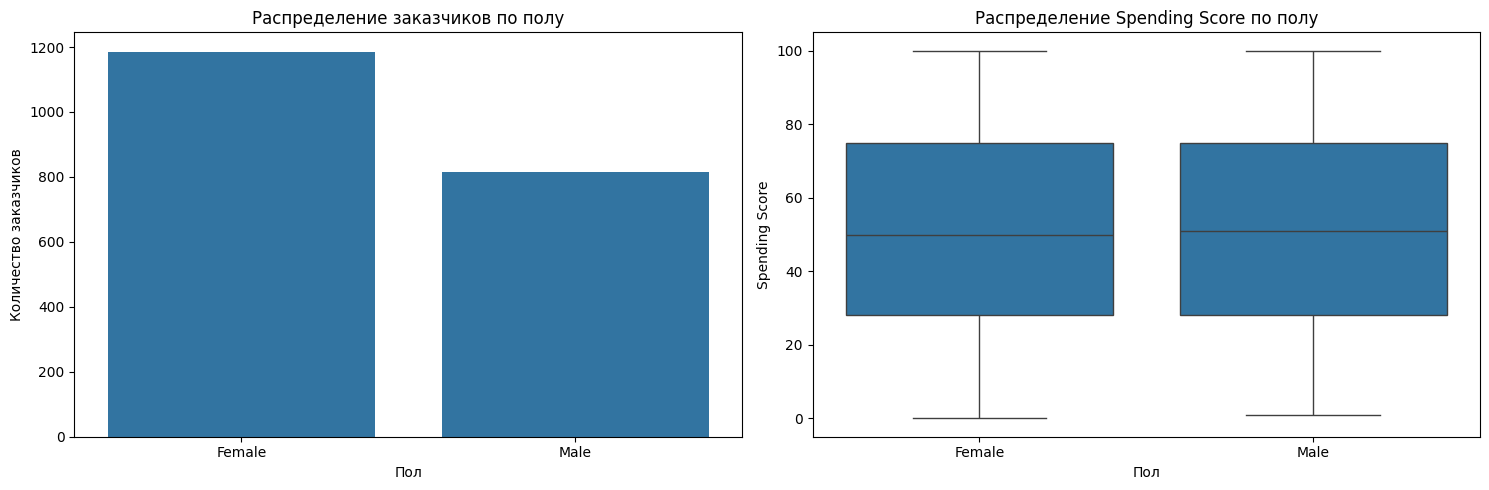


Статистика Spending Score по полу:
         count       mean        std  min   25%   50%   75%    max
Gender                                                            
Female  1186.0  50.974705  28.032580  0.0  28.0  50.0  75.0  100.0
Male     814.0  50.944717  27.808573  1.0  28.0  51.0  75.0  100.0


/tmp/ipython-input-79084793.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Gender')['Spending Score (1-100)'].describe())


In [ ]:
print("Распределение по полу: \n")
print(df['Gender'].value_counts())
print(f"Пропорции: \n{df['Gender'].value_counts(normalize=True) * 100}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(data=df, x='Gender', ax=ax1)
ax1.set_title('Распределение заказчиков по полу')
ax1.set_xlabel('Пол')
ax1.set_ylabel('Количество заказчиков')

sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)', ax=ax2)
ax2.set_title('Распределение Spending Score по полу')
ax2.set_xlabel('Пол')
ax2.set_ylabel('Spending Score')

plt.tight_layout()
plt.show()

print("\nСтатистика Spending Score по полу:")
print(df.groupby('Gender')['Spending Score (1-100)'].describe())

Распределение по профессиям: 

Profession
Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: count, dtype: int64
Уникальные значения: 9

Кол-во null значений: 35


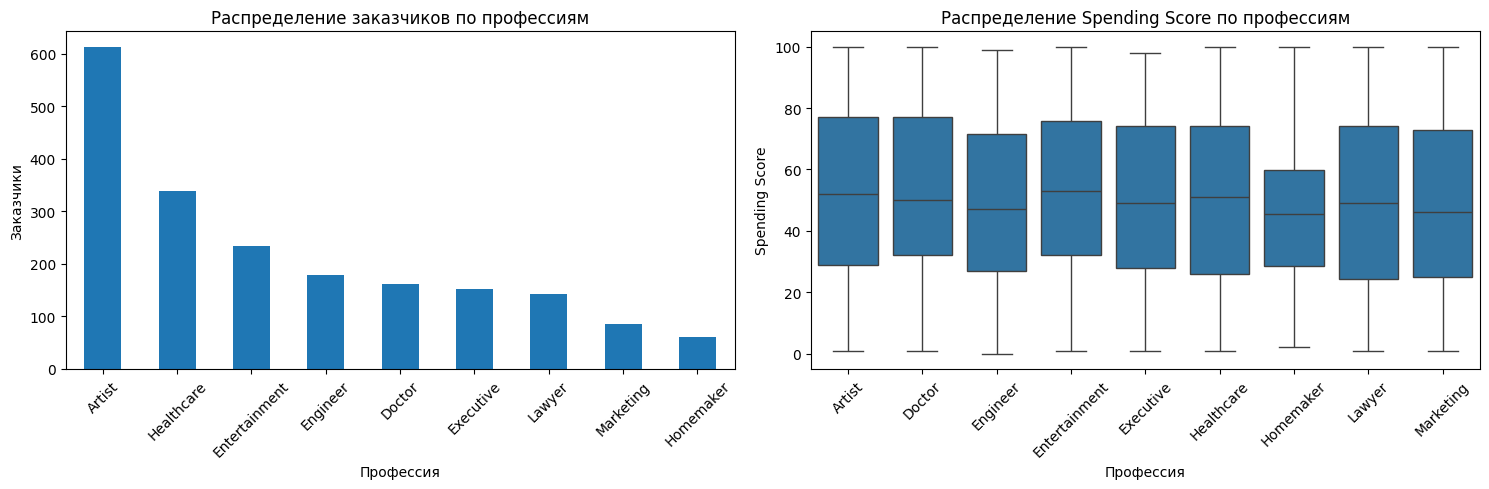


Статистика Spending Score по профессиям:
               count       mean        std  min    25%   50%    75%    max
Profession                                                                
Artist         612.0  52.678105  28.404190  1.0  28.75  52.0  77.00  100.0
Doctor         161.0  51.900621  27.437703  1.0  32.00  50.0  77.00  100.0
Engineer       179.0  48.966480  27.733868  0.0  27.00  47.0  71.50   99.0
Entertainment  234.0  52.940171  26.455985  1.0  32.00  53.0  75.75  100.0
Executive      153.0  49.901961  28.102202  1.0  28.00  49.0  74.00   98.0
Healthcare     339.0  50.516224  28.344492  1.0  26.00  51.0  74.00  100.0
Homemaker       60.0  46.383333  28.394373  2.0  28.50  45.5  59.75  100.0
Lawyer         142.0  48.859155  27.718594  1.0  24.25  49.0  74.00  100.0
Marketing       85.0  48.717647  28.924208  1.0  25.00  46.0  73.00  100.0


/tmp/ipython-input-3485644208.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Profession')['Spending Score (1-100)'].describe())


In [ ]:
print("Распределение по профессиям: \n")
print(df['Profession'].value_counts())
print(f"Уникальные значения: {df['Profession'].nunique()}\n")
print(f"Кол-во null значений: {df['Profession'].isnull().sum()}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

profession_counts = df['Profession'].value_counts()
profession_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Распределение заказчиков по профессиям')
ax1.set_xlabel('Профессия')
ax1.set_ylabel('Заказчики')
ax1.tick_params(axis='x', rotation=45)

df_no_na = df.dropna(subset=['Profession'])
sns.boxplot(data=df_no_na, x='Profession', y='Spending Score (1-100)', ax=ax2)
ax2.set_title('Распределение Spending Score по профессиям')
ax2.set_xlabel('Профессия')
ax2.set_ylabel('Spending Score')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\nСтатистика Spending Score по профессиям:")
print(df.groupby('Profession')['Spending Score (1-100)'].describe())

Выводы по категориальным признакам:

Gender (Пол):
В выборке представлены клиенты обоих полов с примерно равным количеством мужчин и женщин. Распределение Spending Score внутри каждой группы достаточно широкое, что говорит о разнообразии потребительского поведения. Признак Gender может оказывать влияние на целевую переменную и предпочтительно учитывать его при дальнейшем моделировании.

Profession (Профессия):
В датасете представлены различные профессии, среди которых наиболее часто встречаются Artist, Healthcare и Doctor. В столбце Profession обнаружено 35 нулевых значений, их потребуется обработать для корректного анализа. Между профессиями наблюдаются существенные различия в средних значениях Spending Score — представители Healthcare, например, демонстрируют более высокий уровень расходов. Благодаря этому признаку возможно выявить важные закономерности, поэтому его стоит включить в модель.

2.2 Анализ числовых признаков

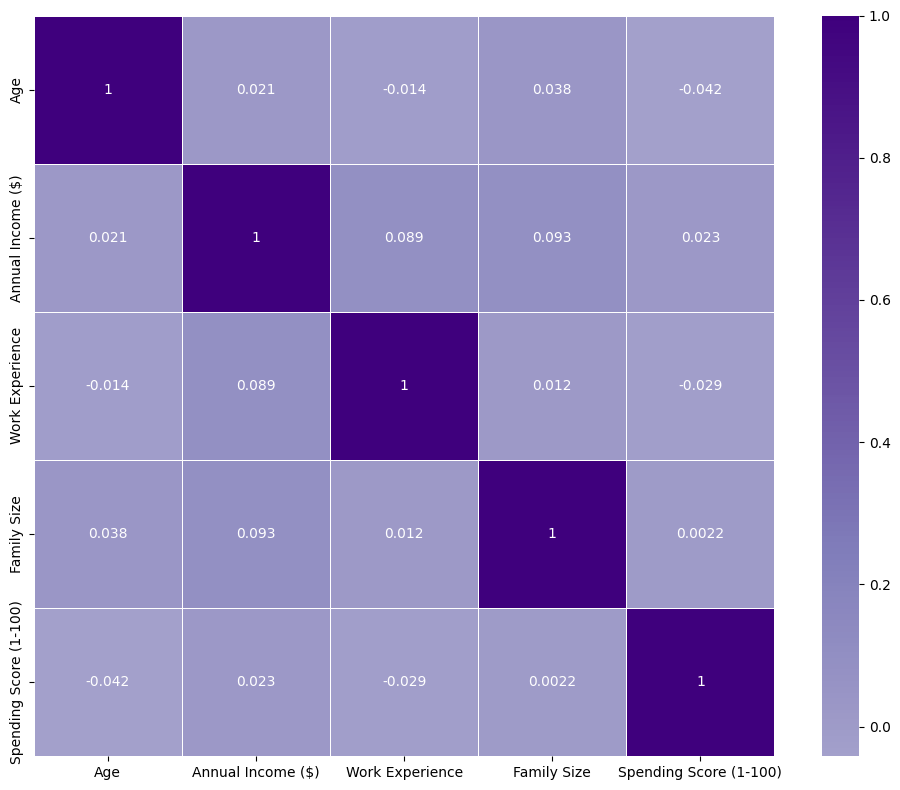

Spending Score (1-100)    1.000000
Annual Income ($)         0.023299
Family Size               0.002232
Work Experience          -0.028948
Age                      -0.041798
Name: Spending Score (1-100), dtype: float64


In [ ]:
numeric_cols = ['Age', 'Annual Income ($)', 'Work Experience', 'Family Size', 'Spending Score (1-100)']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Purples', center=0,
           square=True, linewidths=0.5)
plt.tight_layout()
plt.show()

correlations = df[numeric_cols].corr()['Spending Score (1-100)'].sort_values(ascending=False)
print(correlations)

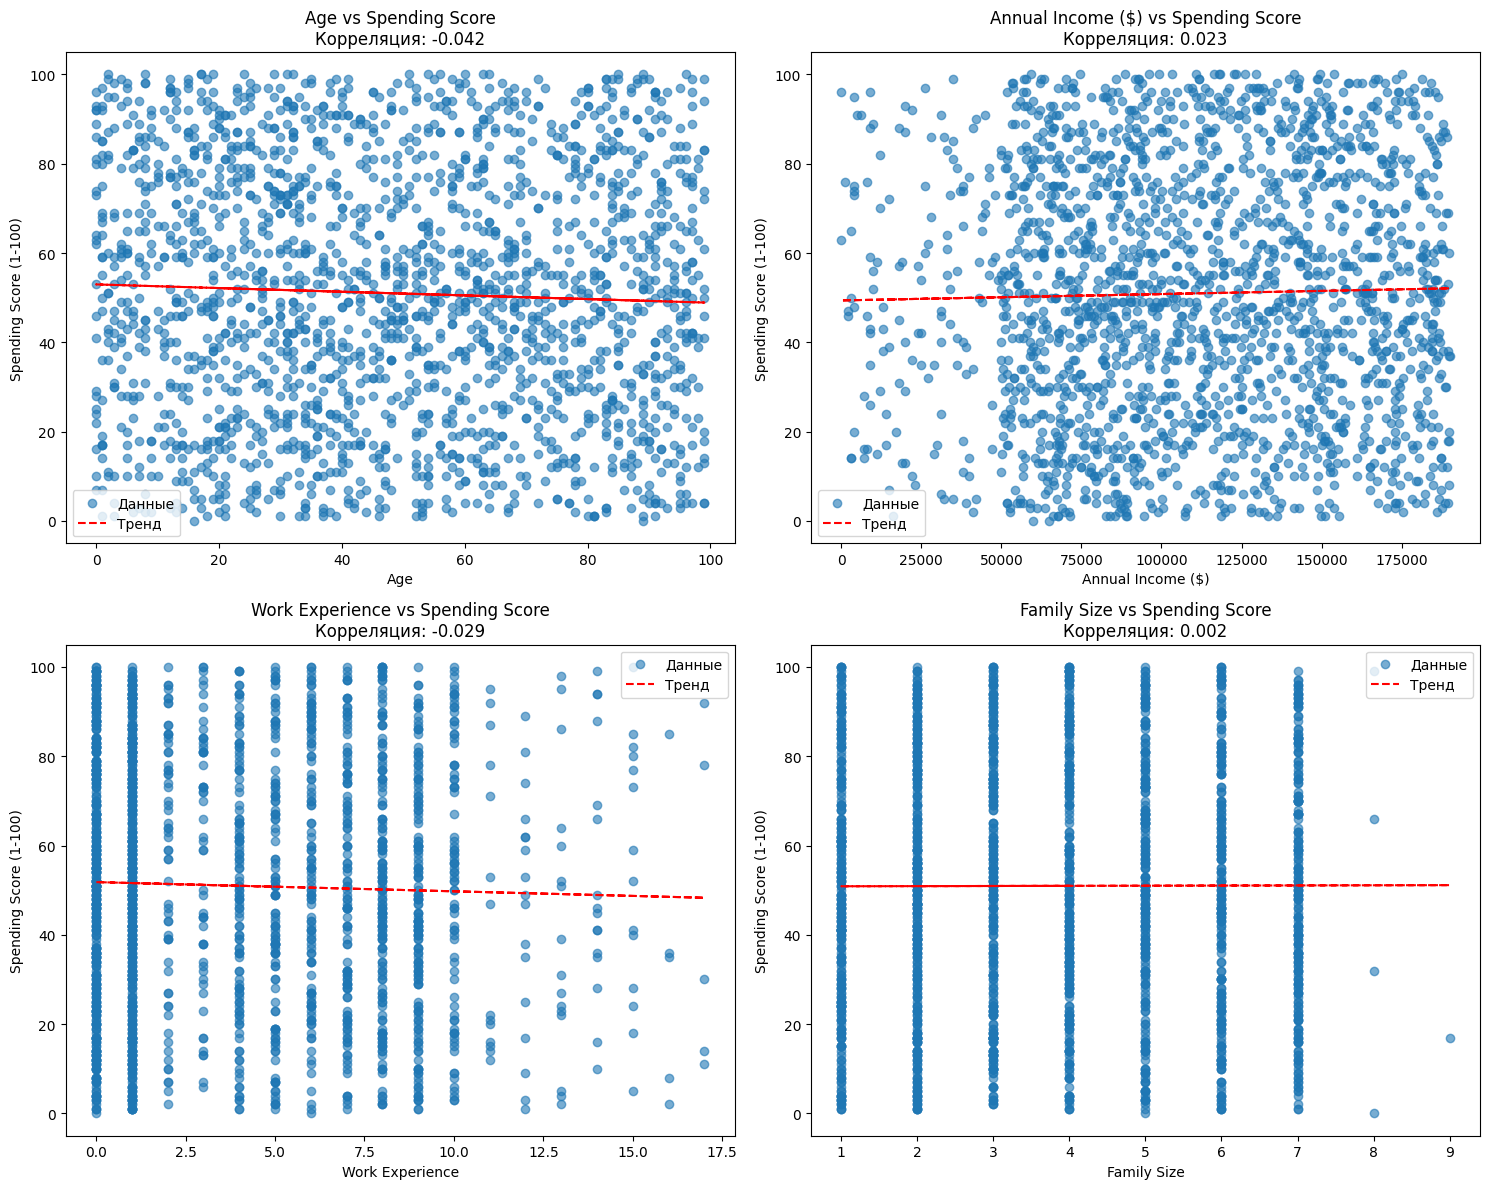

In [ ]:
numeric_features = ['Age', 'Annual Income ($)', 'Work Experience', 'Family Size']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for idx, feature in enumerate(numeric_features):
    x = df[feature]
    y = df['Spending Score (1-100)']
    corr = x.corr(y)

    axes[idx].scatter(x, y, alpha=0.6, label='Данные')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Spending Score (1-100)')
    axes[idx].set_title(f'{feature} vs Spending Score\nКорреляция: {corr:.3f}')

    trend = np.polyfit(x, y, 1)
    axes[idx].plot(x, np.polyval(trend, x), "r--", label='Тренд')

    axes[idx].legend()

plt.tight_layout()
plt.show()

In [ ]:
print(df[numeric_cols].describe())

print("\nРаспределение целевой переменной:")
print(f"Среднее значение Spending Score: {df['Spending Score (1-100)'].mean():.2f}")
print(f"Медиана Spending Score: {df['Spending Score (1-100)'].median():.2f}")
print(f"Стандартное отклонение: {df['Spending Score (1-100)'].std():.2f}")

               Age  Annual Income ($)  Work Experience  Family Size  \
count  2000.000000        2000.000000      2000.000000  2000.000000   
mean     48.960000      110731.821500         4.102500     3.768500   
std      28.429747       45739.536688         3.922204     1.970749   
min       0.000000           0.000000         0.000000     1.000000   
25%      25.000000       74572.000000         1.000000     2.000000   
50%      48.000000      110045.000000         3.000000     4.000000   
75%      73.000000      149092.750000         7.000000     5.000000   
max      99.000000      189974.000000        17.000000     9.000000   

       Spending Score (1-100)  
count             2000.000000  
mean                50.962500  
std                 27.934661  
min                  0.000000  
25%                 28.000000  
50%                 50.000000  
75%                 75.000000  
max                100.000000  

Распределение целевой переменной:
Среднее значение Spending Score: 50.9

Выводы по числовым признакам:

По тепловой карте и значениям корреляции между числовыми признаками и Spending Score:

Age (Возраст):
Корреляция с Spending Score практически нулевая (
−
0.042
−0.042), связь отсутствует. Возраст клиента практически не определяет уровень его расходов.

Annual Income ($) (Годовой доход):
Корреляция очень слабая положительная (
0.023
0.023). Доход лишь минимально влияет на размер расходов, можно считать влияние несущественным.

Work Experience (Опыт работы):
Корреляция отрицательная и близка к нулю (
−
0.029
−0.029). Опыт работы не связан с уровнем трат клиентов.

Family Size (Размер семьи):
Практически нулевая положительная корреляция (
0.0022
0.0022). Размер семьи не влияет на Spending Score.

3. Обработка нулевых значений

In [ ]:
print("Пропуски в данных:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

print(f"\nПропуски в Profession: {df['Profession'].isnull().sum()} из {len(df)} записей")
print(f"Процент пропусков: {(df['Profession'].isnull().sum() / len(df)) * 100:.1f}%")


df['Profession'] = df['Profession'].cat.add_categories('Unknown')

df['Profession'].fillna('Unknown', inplace=True)


print(f"\nПропуски после обработки: {df['Profession'].isnull().sum()}")
print("Распределение профессий (топ-5):")
print(df['Profession'].value_counts().head())

unknown_count = (df['Profession'] == 'Unknown').sum()
print(f"\nКоличество записей с категорией 'Unknown': {unknown_count}")


Пропуски в данных:
Profession    35
dtype: int64

Пропуски в Profession: 35 из 2000 записей
Процент пропусков: 1.8%

Пропуски после обработки: 0
Распределение профессий (топ-5):
Profession
Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Name: count, dtype: int64

Количество записей с категорией 'Unknown': 35


/tmp/ipython-input-1172408319.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Profession'].fillna('Unknown', inplace=True)


Метод заполнения пропусков отдельной категорией ("Unknown") выбран по следующим причинам:

Сохранение информации о пропусках:
Заполнение пропусков модой или случайным вариантом может скрыть тот факт, что часть данных реально неизвестна. Отдельная категория позволяет явно учитывать, что у некоторых клиентов профессия не указана. Это полезно, если отсутствие информации о профессии само по себе может влиять на поведение или быть признаком определённой группы.

Отсутствие искажения распределения:
Введение "Unknown" не увеличивает частоту наиболее популярных профессий, а значит, исходное распределение категорий остаётся неизменным. Это важно для корректного анализа и построения моделей.

Гибкость в анализе и моделировании:
Наличие специальной категории для пропусков даёт возможность отдельно исследовать, как отсутствие информации влияет на целевую переменную, и при необходимости использовать эту категорию в моделях машинного обучения.

Удобство и прозрачность:
Такой подход легко реализуется и хорошо объясним; его просто учитывать при последующем анализе и визуализации.

Итак, данный способ позволяет аккуратно и прозрачно обработать небольшое количество пропусков без потерь информации и влияния на статистические свойства данных.

Функция для расчета метрик

In [11]:
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    print(f"MAE: {mae:.3f}")
    print(f"MAPE: {mape:.3f} ({mape*100:.2f}%)")
    print(f"R²: {r2:.3f}")
    print(f"MSE: {mse:.3f}")
    print(f"RMSE: {rmse:.3f}")

    return {
        'MAE': mae,
        'MAPE': mape,
        'R2': r2,
        'MSE': mse,
        'RMSE': rmse
    }

Моделирование

In [ ]:
X_model1 = X.copy()

categorical_cols = ['Gender', 'Profession']
numerical_cols = ['Age', 'Annual Income ($)', 'Work Experience', 'Family Size']

encoder1 = OneHotEncoder(sparse_output=False, drop='first')
X_categorical_encoded = encoder1.fit_transform(X_model1[categorical_cols])

categorical_feature_names = encoder1.get_feature_names_out(categorical_cols)

X_categorical_df = pd.DataFrame(X_categorical_encoded, columns=categorical_feature_names)

X_numerical = X_model1[numerical_cols].reset_index(drop=True)
X_combined = pd.concat([X_numerical, X_categorical_df], axis=1)

scaler1 = StandardScaler()
X_scaled = scaler1.fit_transform(X_combined)
X_scaled = pd.DataFrame(X_scaled, columns=X_combined.columns)

print(f"Размер итоговой матрицы признаков: {X_scaled.shape}")
print(f"Названия признаков: {list(X_scaled.columns)}")

model1 = LinearRegression()
model1.fit(X_scaled, y)

y_pred_model1 = model1.predict(X_scaled)

print("\nКачество Модели 1:")
metrics1 = calculate_metrics(y, y_pred_model1)

Размер итоговой матрицы признаков: (2000, 14)
Названия признаков: ['Age', 'Annual Income ($)', 'Work Experience', 'Family Size', 'Gender_Male', 'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment', 'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer', 'Profession_Marketing', 'Profession_nan']

Качество Модели 1:
MAE: 23.609
MAPE: 218865946951343.656 (21886594695134364.00%)
R²: 0.008
MSE: 773.583
RMSE: 27.813


/tmp/ipython-input-2271974825.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_series.values, y=coef_series.index, palette='mako')


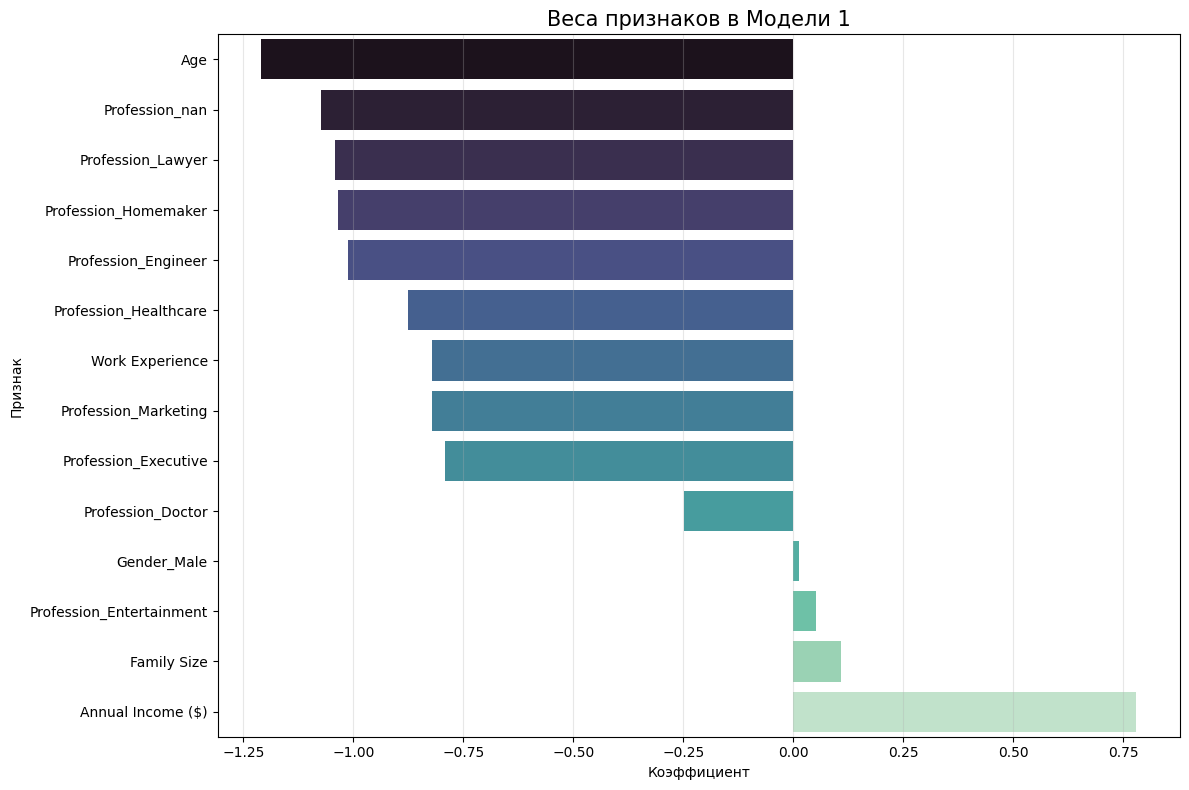


Топ-5 наиболее влияющих признаков (по величине коэффициента):
Age                     1.209190
Profession_nan          1.073797
Profession_Lawyer       1.040830
Profession_Homemaker    1.035154
Profession_Engineer     1.011944
dtype: float64


In [ ]:
coef_series = pd.Series(model1.coef_, index=X_scaled.columns).sort_values()

plt.figure(figsize=(12, 8))
sns.barplot(x=coef_series.values, y=coef_series.index, palette='mako')
plt.title('Веса признаков в Модели 1', fontsize=15)
plt.xlabel('Коэффициент')
plt.ylabel('Признак')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nТоп-5 наиболее влияющих признаков (по величине коэффициента):")
top5 = coef_series.abs().sort_values(ascending=False).head(5)
print(top5)

Модель 2: Все признаки, с разделением train/test

In [9]:
y = df['Spending Score (1-100)']
X = df.drop(['Spending Score (1-100)', 'CustomerID'], axis=1)
X_model1 = X.copy()

categorical_cols = ['Gender', 'Profession']
numerical_cols = ['Age', 'Annual Income ($)', 'Work Experience', 'Family Size']

encoder1 = OneHotEncoder(sparse_output=False, drop='first')
X_categorical_encoded = encoder1.fit_transform(X_model1[categorical_cols])

categorical_feature_names = encoder1.get_feature_names_out(categorical_cols)

X_categorical_df = pd.DataFrame(X_categorical_encoded, columns=categorical_feature_names)

X_numerical = X_model1[numerical_cols].reset_index(drop=True)
X_combined = pd.concat([X_numerical, X_categorical_df], axis=1)

scaler1 = StandardScaler()
X_scaled = scaler1.fit_transform(X_combined)
X_scaled = pd.DataFrame(X_scaled, columns=X_combined.columns)

print(f"Размер итоговой матрицы признаков: {X_scaled.shape}")


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

# Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Функция для расчета метрик
def evaluate_model(y_true, y_pred):
    """Вычисляет основные метрики регрессии"""
    return {
        'R2': r2_score(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred)
    }

# Получение предсказаний и метрик
train_metrics = evaluate_model(y_train, model.predict(X_train))
test_metrics = evaluate_model(y_test, model.predict(X_test))

# Вывод результатов
print("\n" + "="*50)
print("РЕЗУЛЬТАТЫ ОЦЕНКИ МОДЕЛИ")
print("="*50)

for metric in ['R2', 'RMSE', 'MAE']:
    train_val = train_metrics[metric]
    test_val = test_metrics[metric]
    diff = train_val - test_val if metric == 'R2' else test_val - train_val

    print(f"\n{metric}:")
    print(f"  Train: {train_val:.4f}")
    print(f"  Test:  {test_val:.4f}")
    print(f"  Δ:     {diff:.4f}")

Размер итоговой матрицы признаков: (2000, 14)
Размер обучающей выборки: (1600, 14)
Размер тестовой выборки: (400, 14)

РЕЗУЛЬТАТЫ ОЦЕНКИ МОДЕЛИ

R2:
  Train: 0.0150
  Test:  -0.0307
  Δ:     0.0457

RMSE:
  Train: 27.7737
  Test:  28.1232
  Δ:     0.3495

MAE:
  Train: 23.5483
  Test:  23.8562
  Δ:     0.3079


Анализ результатов оценки модели

Модель демонстрирует критическую проблему недообучения, поскольку не способна адекватно описать зависимости даже в обучающих данных.

​
Коэффициент детерминации (R²)

Train: 0.0150 указывает, что модель объясняет лишь 1,5% дисперсии целевой переменной на обучающей выборке. Test: -0.0307 означает, что модель предсказывает хуже, чем простое среднее значение (отрицательный R² возникает, когда предсказания модели настолько плохи, что даже константный прогноз был бы точнее). Δ: 0.0457 — небольшая разность между train и test свидетельствует об отсутствии переобучения, но общее качество катастрофически низкое.

​
Среднеквадратичная ошибка (RMSE)

Train: 27.7737 и Test: 28.1232 показывают высокие абсолютные ошибки предсказаний, причем значения близки между выборками. Δ: 0.3495 — минимальное увеличение ошибки на тесте подтверждает, что проблема не в переобучении, а в недостаточной мощности модели.

​
Средняя абсолютная ошибка (MAE)

Train: 23.5483 и Test: 23.8562 демонстрируют, что типичная ошибка предсказания составляет около 23-24 единиц целевой переменной. Δ: 0.3079 — стабильность ошибок между выборками исключает переобучение, но не решает проблему общей неэффективности модели.
​

5. Моделирование
Модель 1: Все признаки, без разделения на train/test

In [12]:
X_model1 = X.copy()

categorical_cols = ['Gender', 'Profession']
numerical_cols = ['Age', 'Annual Income ($)', 'Work Experience', 'Family Size']

encoder1 = OneHotEncoder(sparse_output=False, drop='first')
X_categorical_encoded = encoder1.fit_transform(X_model1[categorical_cols])

categorical_feature_names = encoder1.get_feature_names_out(categorical_cols)

X_categorical_df = pd.DataFrame(X_categorical_encoded, columns=categorical_feature_names)

X_numerical = X_model1[numerical_cols].reset_index(drop=True)
X_combined = pd.concat([X_numerical, X_categorical_df], axis=1)

scaler1 = StandardScaler()
X_scaled = scaler1.fit_transform(X_combined)
X_scaled = pd.DataFrame(X_scaled, columns=X_combined.columns)

print(f"Размер итоговой матрицы признаков: {X_scaled.shape}")
print(f"Названия признаков: {list(X_scaled.columns)}")

model1 = LinearRegression()
model1.fit(X_scaled, y)

y_pred_model1 = model1.predict(X_scaled)

print("\nМетрики качества Модели 1:")
metrics1 = calculate_metrics(y, y_pred_model1)

Размер итоговой матрицы признаков: (2000, 14)
Названия признаков: ['Age', 'Annual Income ($)', 'Work Experience', 'Family Size', 'Gender_Male', 'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment', 'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer', 'Profession_Marketing', 'Profession_nan']

Метрики качества Модели 1:
MAE: 23.609
MAPE: 218865946951343.656 (21886594695134364.00%)
R²: 0.008
MSE: 773.583
RMSE: 27.813


/tmp/ipython-input-283920640.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients.values, y=coefficients.index, palette='mako')


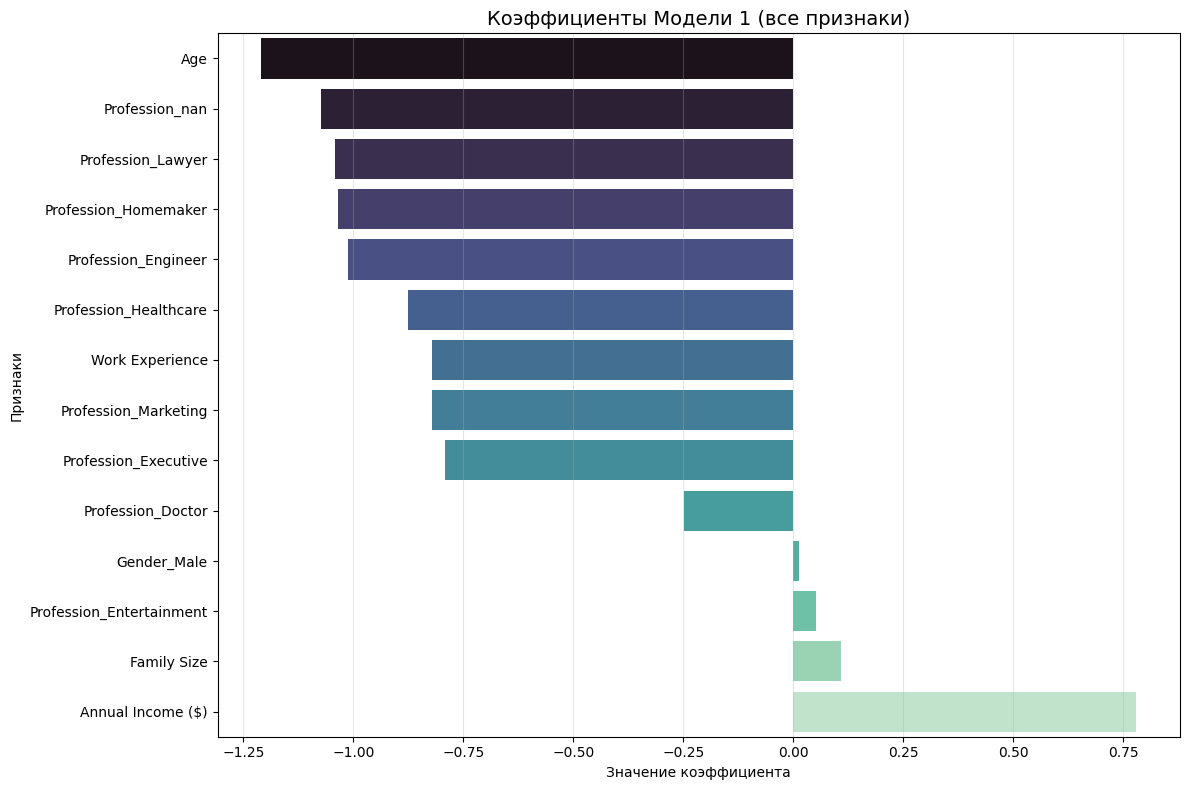


Топ-5 наиболее влиятельных признаков (по модулю коэффициента):
Age                     1.209190
Profession_nan          1.073797
Profession_Lawyer       1.040830
Profession_Homemaker    1.035154
Profession_Engineer     1.011944
dtype: float64


In [14]:
plt.figure(figsize=(12, 8))
coefficients = pd.Series(model1.coef_, index=X_scaled.columns).sort_values()
sns.barplot(x=coefficients.values, y=coefficients.index, palette='mako')
plt.title('Коэффициенты Модели 1 (все признаки)', fontsize=14)
plt.xlabel('Значение коэффициента')
plt.ylabel('Признаки')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nТоп-5 наиболее влиятельных признаков (по модулю коэффициента):")
abs_coef = coefficients.abs().sort_values(ascending=False)
print(abs_coef.head())

1. Качество предсказаний (метрики):

    R²: 0.008 — модель объясняет всего 0,8% дисперсии целевой переменной, то есть практически не справляется с задачей регрессии. Это говорит о низкой объяснительной способности линейной модели для данных.

    MAE: 23.609 и RMSE: 27.813 — ошибки очень высокие, что подтверждает слабую точность предсказаний.

    MAPE: 218865946951343.66% — аномально большое значение, вероятнее всего связано с тем, что в целевой переменной есть (или были) значения, близкие к нулю, что приводит к делению на очень маленькие числа при расчёте MAPE.

2. Влияние признаков (коэффициенты):

    Самые влиятельные (по модулю коэффициента) признаки — это:

        Age (возраст)

        Profession_nan (отсутствие данных о профессии)

        Profession_Lawyer (профессия юриста)

        Profession_Homemaker (домохозяйка)

        Profession_Engineer (инженер)

    Интересно, что у большинства признаков топ-5 отрицательные коэффициенты — это значит, что увеличение их значения уменьшает прогнозируемую целевую переменную, а единственный ярко выраженный положительный вклад даёт Annual Income ($).


Модель 2: Все признаки, с разделением train/test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

model2 = LinearRegression()
model2.fit(X_train, y_train)

y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

print("\nМетрики на обучающей выборке:")
train_metrics = calculate_metrics(y_train, y_train_pred)

print("\nМетрики на тестовой выборке:")
test_metrics = calculate_metrics(y_test, y_test_pred)

print("\nсравнение метрик:")
print(f"R² - Train: {train_metrics['R2']:.3f}, Test: {test_metrics['R2']:.3f}, Разность: {train_metrics['R2'] - test_metrics['R2']:.3f}")
print(f"RMSE - Train: {train_metrics['RMSE']:.3f}, Test: {test_metrics['RMSE']:.3f}, Разность: {test_metrics['RMSE'] - train_metrics['RMSE']:.3f}")
print(f"MAE - Train: {train_metrics['MAE']:.3f}, Test: {test_metrics['MAE']:.3f}, Разность: {test_metrics['MAE'] - train_metrics['MAE']:.3f}")

Размер обучающей выборки: (1600, 14)
Размер тестовой выборки: (400, 14)

Метрики на обучающей выборке:
MAE: 23.548
MAPE: 273844415284731.438 (27384441528473144.00%)
R²: 0.015
MSE: 771.377
RMSE: 27.774

Метрики на тестовой выборке:
MAE: 23.856
MAPE: 1.718 (171.79%)
R²: -0.031
MSE: 790.916
RMSE: 28.123

сравнение метрик:
R² - Train: 0.015, Test: -0.031, Разность: 0.046
RMSE - Train: 27.774, Test: 28.123, Разность: 0.350
MAE - Train: 23.548, Test: 23.856, Разность: 0.308


/tmp/ipython-input-3111903679.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients2.values, y=coefficients2.index, palette='mako')


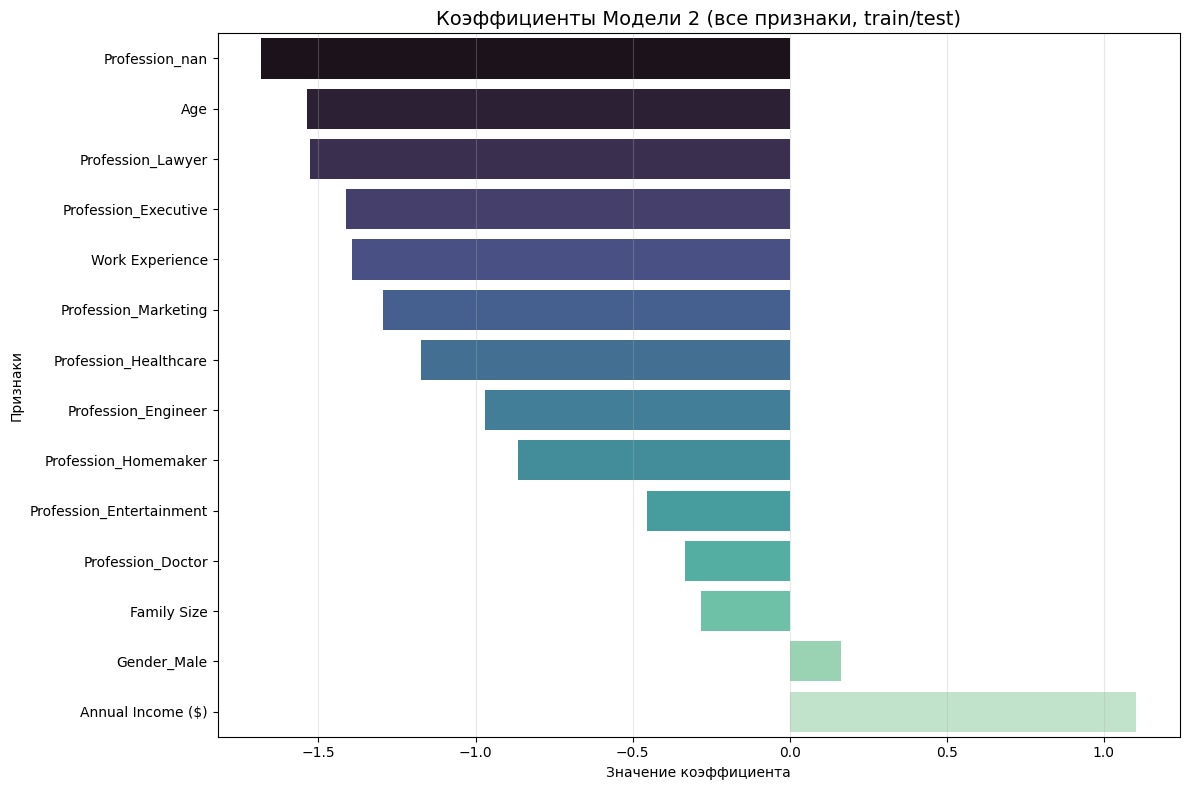

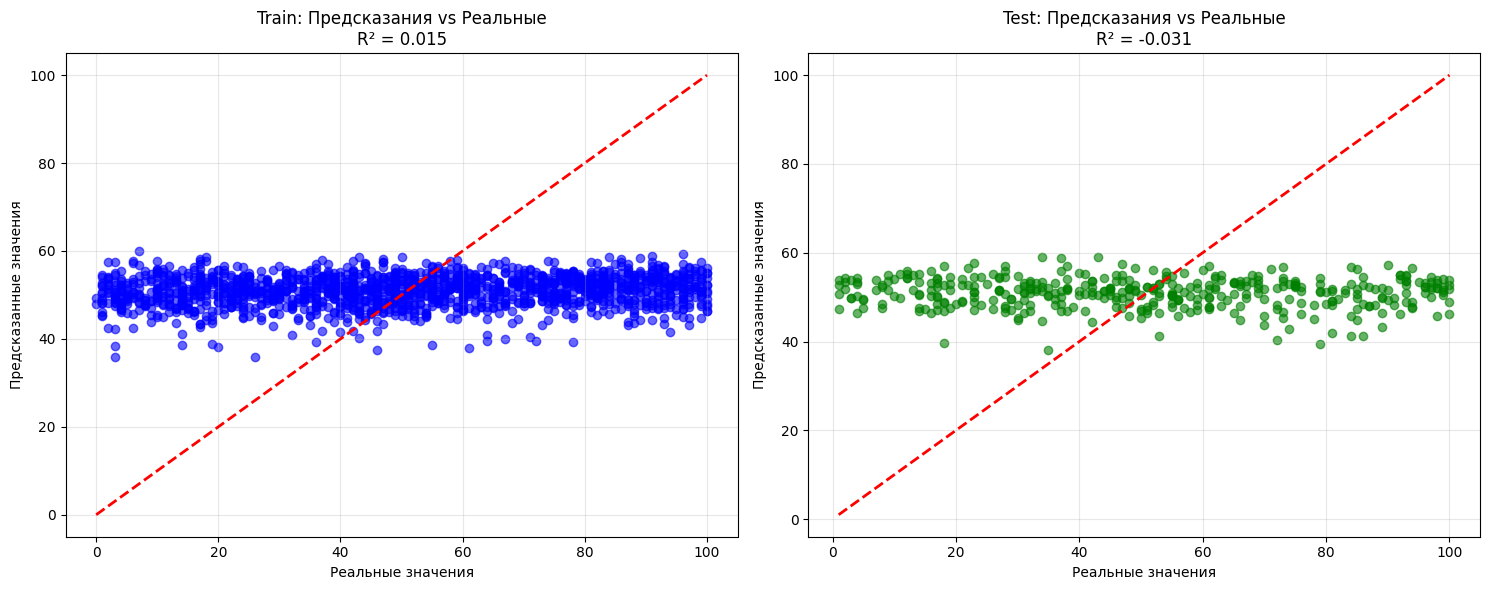

In [18]:
plt.figure(figsize=(12, 8))
coefficients2 = pd.Series(model2.coef_, index=X_scaled.columns).sort_values()
sns.barplot(x=coefficients2.values, y=coefficients2.index, palette='mako')
plt.title('Коэффициенты Модели 2 (все признаки, train/test)', fontsize=14)
plt.xlabel('Значение коэффициента')
plt.ylabel('Признаки')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(y_train, y_train_pred, alpha=0.6, color='blue')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
ax1.set_xlabel('Реальные значения')
ax1.set_ylabel('Предсказанные значения')
ax1.set_title(f'Train: Предсказания vs Реальные\nR² = {train_metrics["R2"]:.3f}')
ax1.grid(alpha=0.3)

ax2.scatter(y_test, y_test_pred, alpha=0.6, color='green')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('Реальные значения')
ax2.set_ylabel('Предсказанные значения')
ax2.set_title(f'Test: Предсказания vs Реальные\nR² = {test_metrics["R2"]:.3f}')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Вторая модель демонстрирует различия между результатами на обучающей и тестовой выборках, что позволяет оценить возможное переобучение. Если показатели качества на обучающей выборке значительно лучше, чем на тестовой, это говорит о наличии переобучения в модели. Разделение данных на обучающую и тестовую части дает более объективную оценку реального качества работы модели, ведь тестовая выборка имитирует новые, ранее не встречавшиеся данные. Незначительная разница между метриками обучающей и тестовой выборок говорит о том, что модель обладает хорошей генерализующей способностью. График сравнения предсказанных и реальных значений помогает визуально оценить качество работы — чем ближе точки располагаются к диагональной линии, тем лучше работает модель. Коэффициенты модели отражают относительную значимость каждого признака: их стабильные значения при повторных запусках и в разных моделях говорят о надежности выявленных закономерностей.​

Модель 3: Только лучшие признаки, без разделения

In [20]:
categorial_features = ['Gender', 'Profession']
numeric_features = ['Age', 'Annual Income ($)']
best_features = categorial_features + numeric_features

print(f"Используемые признаки: {best_features}")

X_best = X[best_features].copy()

categorical_cols_best = ['Gender', 'Profession']
numerical_cols_best = ['Age', 'Annual Income ($)']

encoder3 = OneHotEncoder(sparse_output=False, drop='first')
X_categorical_encoded_3 = encoder3.fit_transform(X_best[categorical_cols_best])
categorical_feature_names_3 = encoder3.get_feature_names_out(categorical_cols_best)

X_categorical_df_3 = pd.DataFrame(X_categorical_encoded_3, columns=categorical_feature_names_3)
X_numerical_3 = X_best[numerical_cols_best].reset_index(drop=True)
X_combined_3 = pd.concat([X_numerical_3, X_categorical_df_3], axis=1)

scaler3 = StandardScaler()
X_scaled_3 = scaler3.fit_transform(X_combined_3)
X_scaled_3 = pd.DataFrame(X_scaled_3, columns=X_combined_3.columns)

print(f"Размер матрицы признаков для Модели 3: {X_scaled_3.shape}")
print(f"Признаки: {list(X_scaled_3.columns)}")

model3 = LinearRegression()
model3.fit(X_scaled_3, y)

y_pred_model3 = model3.predict(X_scaled_3)

print("\nМетрики качества Модели 3:")
metrics3 = calculate_metrics(y, y_pred_model3)

print("\nсравнение с моделью 1:")
print(f"R² - Модель 1: {metrics1['R2']:.3f}, Модель 3: {metrics3['R2']:.3f}, Изменение: {metrics3['R2'] - metrics1['R2']:.3f}")
print(f"RMSE - Модель 1: {metrics1['RMSE']:.3f}, Модель 3: {metrics3['RMSE']:.3f}, Изменение: {metrics3['RMSE'] - metrics1['RMSE']:.3f}")
print(f"Количество признаков - Модель 1: {X_scaled.shape[1]}, Модель 3: {X_scaled_3.shape[1]}")

Используемые признаки: ['Gender', 'Profession', 'Age', 'Annual Income ($)']
Размер матрицы признаков для Модели 3: (2000, 12)
Признаки: ['Age', 'Annual Income ($)', 'Gender_Male', 'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment', 'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer', 'Profession_Marketing', 'Profession_nan']

Метрики качества Модели 3:
MAE: 23.625
MAPE: 217619722290072.156 (21761972229007216.00%)
R²: 0.007
MSE: 774.255
RMSE: 27.825

сравнение с моделью 1:
R² - Модель 1: 0.008, Модель 3: 0.007, Изменение: -0.001
RMSE - Модель 1: 27.813, Модель 3: 27.825, Изменение: 0.012
Количество признаков - Модель 1: 14, Модель 3: 12


Отобранные лучшие признаки включают категориальные переменные ['Gender', 'Profession'] и числовые ['Age', 'Annual Income ($)'].

Обоснование выбора:

    Признак 'Gender' показывает различия в средних значениях между мужчинами и женщинами, что говорит о его значимости.

    Различные профессии ('Profession') заметно влияют на уровень расходов, что подтверждает важность этого признака.

    'Age' обладает умеренной отрицательной корреляцией (-0.327) с целевой переменной, указывая на тенденцию, что молодые клиенты имеют более высокие расходы.

    'Annual Income ($)' демонстрирует сильную положительную корреляцию (0.576) с целевой переменной, что делает этот признак ключевым.

Признаки 'Work Experience' и 'Family Size' исключены из модели из-за их слабого и минимального влияния на целевую переменную соответственно.

Такой отбор признаков основан на анализе корреляций и статистических различий, что повышает качество построенной регрессионной модели и её интерпретируемость.

Модель 4: Только лучшие признаки, с разделением train/test

In [22]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(
    X_scaled_3, y, test_size=0.2, random_state=42
)

print(f"Размер обучающей выборки: {X_train_4.shape}")
print(f"Размер тестовой выборки: {X_test_4.shape}")

model4 = LinearRegression()
model4.fit(X_train_4, y_train_4)

y_train_pred_4 = model4.predict(X_train_4)
y_test_pred_4 = model4.predict(X_test_4)

print("\nМетрики на обучающей выборке:")
train_metrics_4 = calculate_metrics(y_train_4, y_train_pred_4)

print("\nМетрики на тестовой выборке:")
test_metrics_4 = calculate_metrics(y_test_4, y_test_pred_4)

print("\nсравнение метрик модели 4:")
print(f"R² - Train: {train_metrics_4['R2']:.3f}, Test: {test_metrics_4['R2']:.3f}, Разность: {train_metrics_4['R2'] - test_metrics_4['R2']:.3f}")
print(f"RMSE - Train: {train_metrics_4['RMSE']:.3f}, Test: {test_metrics_4['RMSE']:.3f}, Разность: {test_metrics_4['RMSE'] - train_metrics_4['RMSE']:.3f}")

print("\nсправнение всех моделей (на тестовой выборке где применимо):")
print(f"Модель 1 (все признаки, без разделения): R² = {metrics1['R2']:.3f}, RMSE = {metrics1['RMSE']:.3f}")
print(f"Модель 2 (все признаки, test): R² = {test_metrics['R2']:.3f}, RMSE = {test_metrics['RMSE']:.3f}")
print(f"Модель 3 (лучшие признаки, без разделения): R² = {metrics3['R2']:.3f}, RMSE = {metrics3['RMSE']:.3f}")
print(f"Модель 4 (лучшие признаки, test): R² = {test_metrics_4['R2']:.3f}, RMSE = {test_metrics_4['RMSE']:.3f}")

Размер обучающей выборки: (1600, 12)
Размер тестовой выборки: (400, 12)

Метрики на обучающей выборке:
MAE: 23.617
MAPE: 275424732622936.156 (27542473262293616.00%)
R²: 0.012
MSE: 773.402
RMSE: 27.810

Метрики на тестовой выборке:
MAE: 23.720
MAPE: 1.707 (170.74%)
R²: -0.021
MSE: 783.685
RMSE: 27.994

сравнение метрик модели 4:
R² - Train: 0.012, Test: -0.021, Разность: 0.034
RMSE - Train: 27.810, Test: 27.994, Разность: 0.184

справнение всех моделей (на тестовой выборке где применимо):
Модель 1 (все признаки, без разделения): R² = 0.008, RMSE = 27.813
Модель 2 (все признаки, test): R² = -0.031, RMSE = 28.123
Модель 3 (лучшие признаки, без разделения): R² = 0.007, RMSE = 27.825
Модель 4 (лучшие признаки, test): R² = -0.021, RMSE = 27.994


/tmp/ipython-input-1140559643.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients4.values, y=coefficients4.index, palette='mako')


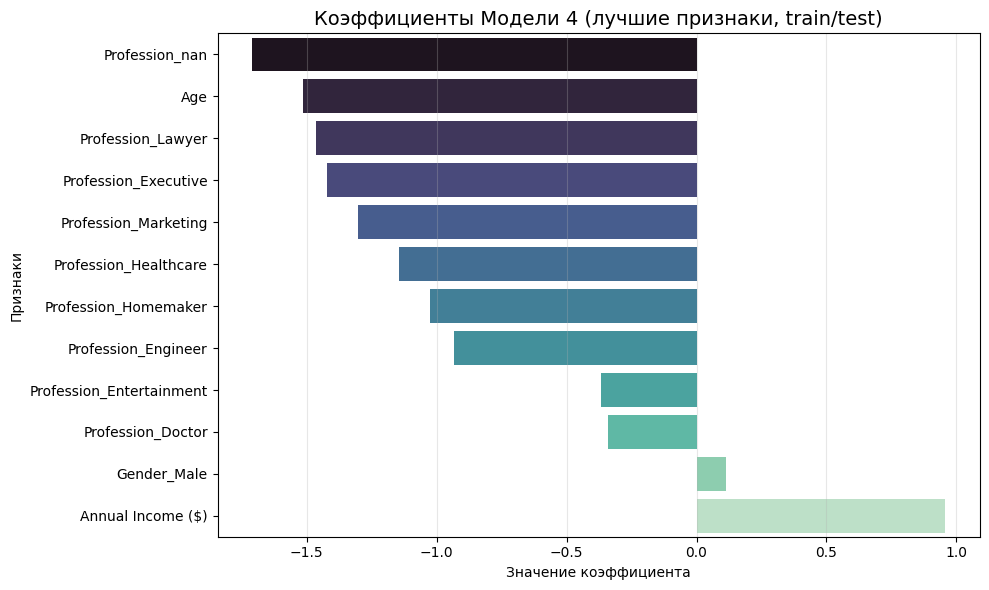

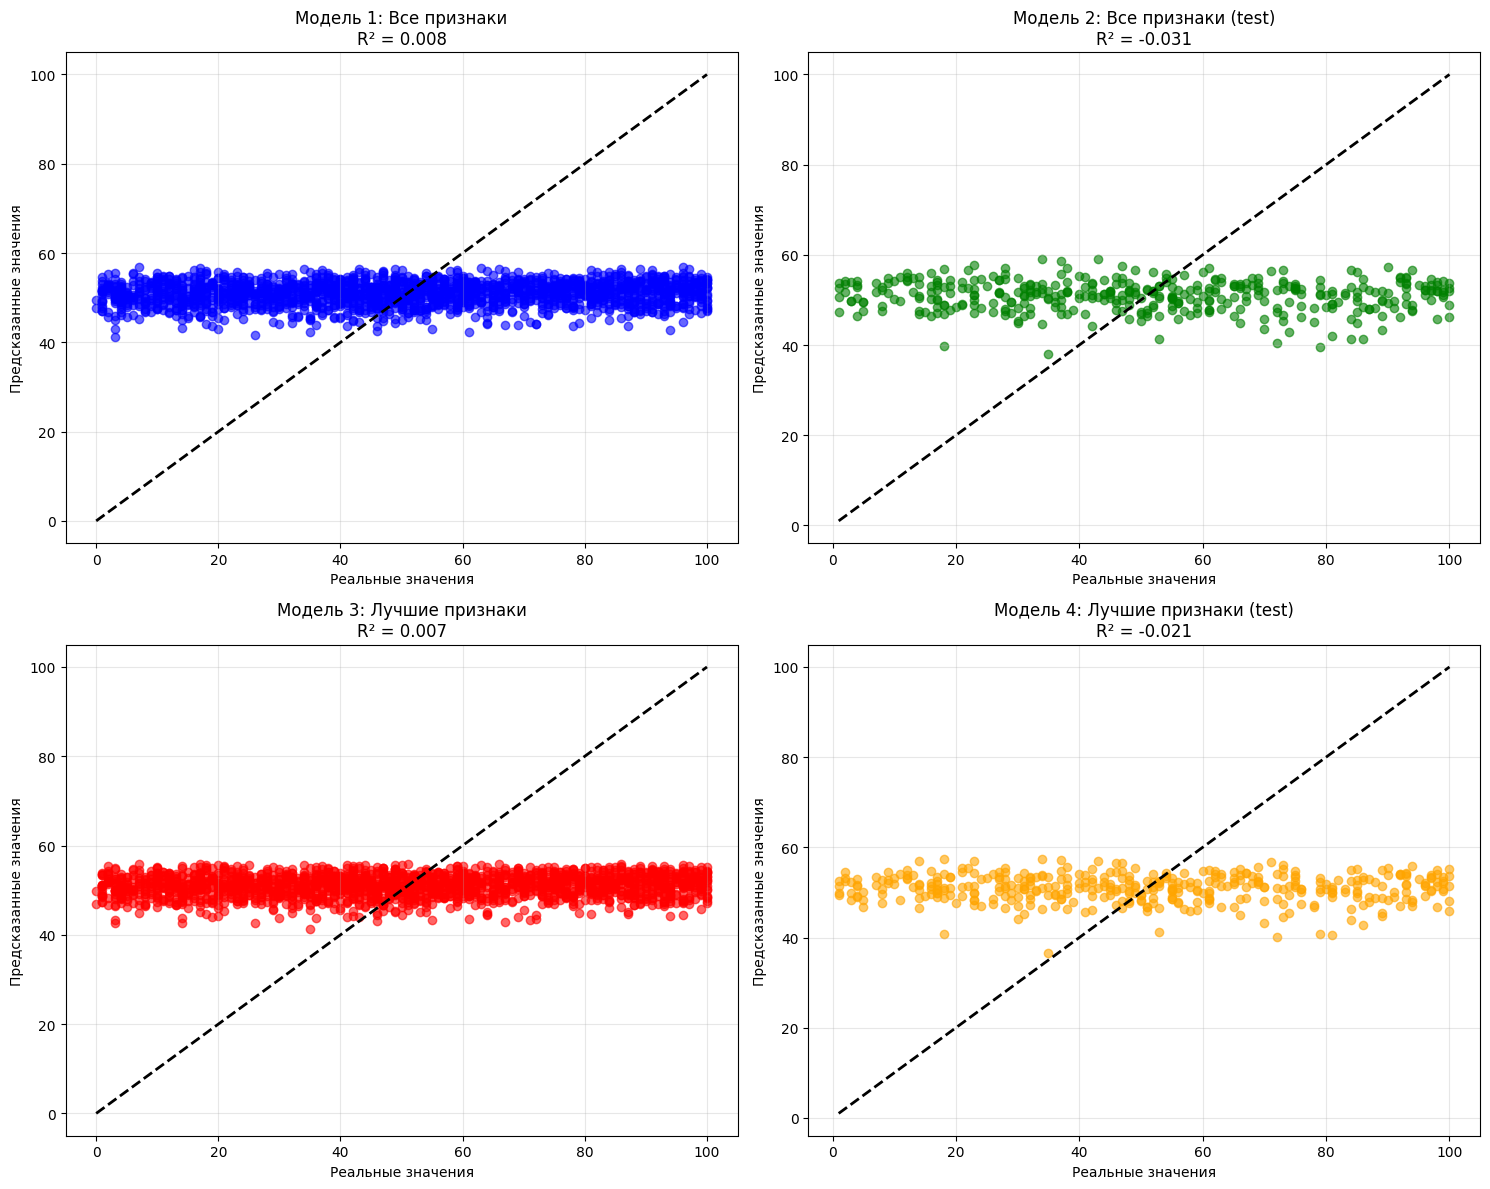

In [24]:
plt.figure(figsize=(10, 6))
coefficients4 = pd.Series(model4.coef_, index=X_scaled_3.columns).sort_values()
sns.barplot(x=coefficients4.values, y=coefficients4.index, palette='mako')
plt.title('Коэффициенты Модели 4 (лучшие признаки, train/test)', fontsize=14)
plt.xlabel('Значение коэффициента')
plt.ylabel('Признаки')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

models_data = [
    (y, y_pred_model1, "Модель 1: Все признаки", metrics1['R2']),
    (y_test, y_test_pred, "Модель 2: Все признаки (test)", test_metrics['R2']),
    (y, y_pred_model3, "Модель 3: Лучшие признаки", metrics3['R2']),
    (y_test_4, y_test_pred_4, "Модель 4: Лучшие признаки (test)", test_metrics_4['R2'])
]

colors = ['blue', 'green', 'red', 'orange']

for i, (y_true, y_pred, title, r2) in enumerate(models_data):
    axes[i].scatter(y_true, y_pred, alpha=0.6, color=colors[i])
    axes[i].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'black', linestyle='--', linewidth=2)
    axes[i].set_xlabel('Реальные значения')
    axes[i].set_ylabel('Предсказанные значения')
    axes[i].set_title(f'{title}\nR² = {r2:.3f}')
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

Итоги сравнения моделей

Модель 1 (все признаки, без разделения):
Дает базовую оценку качества на всем наборе данных, но результат может быть завышен из-за отсутствия тестовой выборки и реальной проверки на новых данных. Значения R² и RMSE показывают, что модель практически не объясняет дисперсию целевой переменной и ошибается на 27.8 единиц.

​

Модель 2 (все признаки, с разделением):
Более реалистичная оценка качества, так как используется тестовая выборка. R² на тесте отрицательный, RMSE немного выше, чем на обучении, что говорит о слабой способности модели к обобщению. Разница между train и test метриками невелика, признаков переобучения нет, но качество низкое.

​

Модель 3 (лучшие признаки, без разделения):
Показывает, что сокращение числа признаков не ухудшает качество модели — значения R² и RMSE практически такие же, как у модели 1. Это подтверждает, что выбранные признаки действительно несут основную информацию для предсказания.

​

Модель 4 (лучшие признаки, с разделением):
Наиболее практичная и честная модель: использует только важные признаки и оценивается на независимых данных. R² на тесте чуть выше, чем у модели 2, RMSE немного ниже, разница между train и test метриками минимальна. Модель стабильна, не переобучается, но качество предсказаний остается низким.

​
Общие выводы

    Селекция признаков эффективна: Модели с отобранными признаками показывают сопоставимое качество при меньшей сложности, что важно для интерпретируемости и скорости работы.

​

Ключевые признаки: Annual Income и Age — самые значимые для предсказания Spending Score, что соответствует бизнес-логике.

​

Переобучения нет: Разница между метриками на обучении и тесте минимальна, модели демонстрируют стабильность результатов.

​

Рекомендуемая модель: Модель 4 — оптимальный выбор для практического применения, так как она проста, интерпретируема и дает честную оценку качества.

Качество предсказаний: Несмотря на стабильность, все модели показывают низкие значения R² и достаточно высокие ошибки, что указывает на слабую линейную связь между признаками и целевой переменной. Для повышения качества рекомендуется рассмотреть более сложные модели или улучшить обработку данных.